In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def my_hessenberg(A):
    # reduces A (real matrix) to upper Hessenberg form
    n = A.shape[0]
    H = A.copy()
    Q = np.eye(n)
    for k in range(n-2):
        # set up reflector
        x = H[k+1:n,k].copy().reshape(-1,1)
        if np.linalg.norm(x)==0:
            gamma=0
        else:        
            tau = np.sign(x[0])*np.linalg.norm(x)
            x[0] = x[0]+tau
            gamma = x[0]/tau
            x = x/x[0]
        # multiply from the left
        H[k+1:n,:] = H[k+1:n,:] - gamma*x.dot(x.T.dot(H[k+1:n,:]))
        # multiply from the right
        H[:,k+1:n] = H[:,k+1:n] - gamma*(H[:,k+1:n].dot(x)).dot(x.T)
        # multiply Q by the reflector
        Q[k+1:n,:] = Q[k+1:n,:] - gamma*x.dot(x.T.dot(Q[k+1:n,:]))
    return H,Q

In [3]:
A = np.random.randn(10,10)
H,Q = my_hessenberg(A)

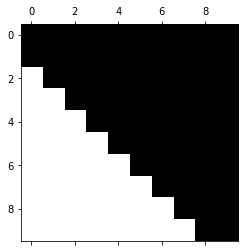

In [4]:
plt.spy(H,precision=1e-10)

In [5]:
# QAQ^T = H
np.linalg.norm(Q.dot(A).dot(Q.T)-H)

4.7568250266244844e-15

In [6]:
evalues, evectors = np.linalg.eig(A)
evalues

array([-3.15415073+0.j        ,  3.25372143+0.j        ,
        0.56142315+2.77872975j,  0.56142315-2.77872975j,
        1.48599097+1.253902j  ,  1.48599097-1.253902j  ,
       -1.594019  +0.j        ,  0.31320661+1.18335436j,
        0.31320661-1.18335436j,  0.10753416+0.j        ])

In [7]:
evalues, evectors = np.linalg.eig(H)
evalues

array([-3.15415073+0.j        ,  3.25372143+0.j        ,
        0.56142315+2.77872975j,  0.56142315-2.77872975j,
        1.48599097+1.253902j  ,  1.48599097-1.253902j  ,
       -1.594019  +0.j        ,  0.31320661+1.18335436j,
        0.31320661-1.18335436j,  0.10753416+0.j        ])

## QR factorization of Hessenberg matrix

In [8]:
np.array([2+3*1j]).conj()

array([2.-3.j])

In [9]:
def my_qr_hess(A):
    'computes the QR factorization of a Hessenberg matrix'
    n = A.shape[0]
    R = A.copy()
    Q = np.eye(n) + 0*1j
    for i in range(n-1):
        x = R[[i,i+1],i]
        if np.linalg.norm(x)==0:
            rotator = np.array([[1,0],[0,1]])
        else:
            rotator = np.array([[x[0].conj(),x[1].conj()],
                                [-x[1],x[0]]])/np.linalg.norm(x)
        # multiply R by the rotator
        R[[i,i+1],:] = rotator.dot(R[[i,i+1],:])
        Q[[i,i+1],:] = rotator.dot(Q[[i,i+1],:])
    return R,Q.conj().T

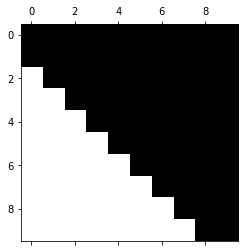

In [10]:
plt.spy(H,precision=1e-10)

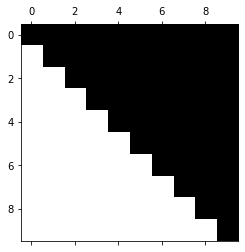

In [11]:
R,Q = my_qr_hess(H)
plt.spy(R,precision=1e-10)

In [12]:
# H = QR
np.linalg.norm(H-Q.dot(R))

1.801187911319997e-15

In [13]:
# complex matrix
A = np.random.randn(10,10)+1j*np.random.randn(10,10)

In [14]:
from scipy.linalg import hessenberg
H,Q = hessenberg(A,calc_q=True)

In [15]:
R,Q = my_qr_hess(H)

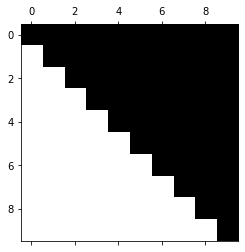

In [16]:
plt.spy(R,precision=1e-10)

## implicit qr algorithm

In [17]:
A = np.random.randn(10,10)+1j*np.random.randn(10,10)
# reduce A to Hessenberg form
from scipy.linalg import hessenberg
A = hessenberg(A)

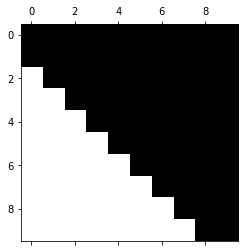

In [18]:
plt.spy(A,precision=1e-5)

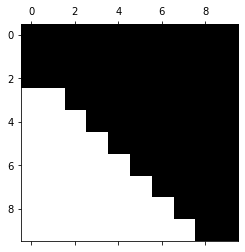

In [19]:
x = A[[0,1],0]
rotator = np.array([[x[0].conj(), x[1].conj()],[-x[1],x[0]]])/np.linalg.norm(x)
# multiply A by Q from the left
A[[0,1],:] = rotator.dot(A[[0,1],:])
# multiply A by Q^* from the right
A[:,[0,1]] = A[:,[0,1]].dot(rotator.conj().T)
plt.spy(A,precision=1e-5)

In [20]:
i = 0

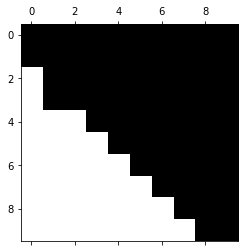

In [21]:

# build the rotator
x = A[[i+1,i+2],i]
rotator = np.array([[x[0].conj(),x[1].conj()],
                    [-x[1],x[0]]])/np.linalg.norm(x)
# multiply by the rotator from the left
A[[i+1,i+2]] = rotator.dot(A[[i+1,i+2]])
# multiply by the rotator from the right
A[:,[i+1,i+2]] = A[:,[i+1,i+2]].dot(rotator.conj().T)
plt.spy(A,precision=1e-5)
i += 1

In [22]:
A = np.random.randn(10,10)+1j*np.random.randn(10,10)
A = hessenberg(A)

In [23]:
n = A.shape[0]

In [24]:
from IPython.display import clear_output

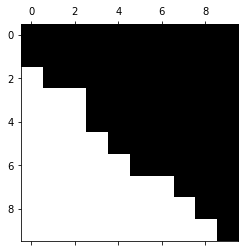

In [25]:
max_iter = 100
for it in range(max_iter):
    x = A[[0,1],0]
    rotator = np.array([[x[0].conj(),x[1].conj()],
                    [-x[1],x[0]]])/np.linalg.norm(x)
    A[[0,1]] = rotator.dot(A[[0,1]])
    A[:,[0,1]] = A[:,[0,1]].dot(rotator.conj().T)
    for i in range(n-2):
        clear_output(wait=True)
        x = A[[i+1,i+2],i]
        rotator = np.array([[x[0].conj(),x[1].conj()],
                    [-x[1],x[0]]])/np.linalg.norm(x)
        A[[i+1,i+2]] = rotator.dot(A[[i+1,i+2]])
        A[:,[i+1,i+2]] = A[:,[i+1,i+2]].dot(rotator.conj().T)
        plt.spy(A,precision=1e-5)
        plt.pause(0.1)

In [40]:
A = np.random.randn(10,10)+1j*np.random.randn(10,10)
A = hessenberg(A)

In [41]:
evalues, evectors = np.linalg.eig(A)

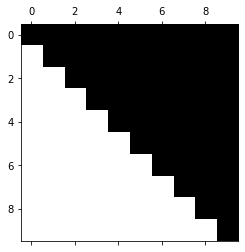

In [42]:
n = A.shape[0]
for j in range(1,n):
    while np.abs(A[n-1,n-2])>1e-16*(np.abs(A[n-2,n-2])+np.abs(A[n-1,n-1])):
        shift = A[n-1,n-1]
        x = A[[0,1],0]-np.array([shift,0])
        rotator = np.array([[x[0].conj(),x[1].conj()],
                        [-x[1],x[0]]])/np.linalg.norm(x)
        A[[0,1]] = rotator.dot(A[[0,1]])
        A[:,[0,1]] = A[:,[0,1]].dot(rotator.conj().T)
        clear_output(wait=True)
        plt.spy(A,precision=1e-5)
        plt.pause(0.05)
        for i in range(n-2):
            clear_output(wait=True)
            x = A[[i+1,i+2],i]
            rotator = np.array([[x[0].conj(),x[1].conj()],
                        [-x[1],x[0]]])/np.linalg.norm(x)
            A[[i+1,i+2]] = rotator.dot(A[[i+1,i+2]])
            A[:,[i+1,i+2]] = A[:,[i+1,i+2]].dot(rotator.conj().T)
            plt.spy(A,precision=1e-5)
            plt.pause(0.05)
    n = n-1

In [43]:
np.diag(A)

array([-0.60398352+4.34631145j,  2.0317654 +2.95444139j,
        3.50447149+1.25524478j,  1.85179524-3.79343851j,
       -1.07254377+2.29320096j, -2.70079097-0.44531246j,
       -1.40506397+0.82472088j,  1.27312025-1.89638821j,
        1.51811053-0.15168289j, -1.0918782 -1.6447569j ])

In [44]:
evalues

array([-0.60398352+4.34631145j,  2.0317654 +2.95444139j,
        3.50447149+1.25524478j,  1.85179524-3.79343851j,
       -1.07254377+2.29320096j, -2.70079097-0.44531246j,
       -1.40506397+0.82472088j,  1.51811053-0.15168289j,
        1.27312025-1.89638821j, -1.0918782 -1.6447569j ])

In [58]:
def my_eig(A):
    n = A.shape[0]
    H = A.copy()
    H = hessenberg(H)
    for j in range(1,n):
        while np.abs(H[n-1,n-2])>1e-16*(np.abs(H[n-2,n-2])+np.abs(H[n-1,n-1])):
            shift = H[n-1,n-1]
            x = H[[0,1],0]-np.array([shift,0])
            rotator = np.array([[x[0].conj(),x[1].conj()],
                            [-x[1],x[0]]])/np.linalg.norm(x)
            H[[0,1]] = rotator.dot(H[[0,1]])
            H[:,[0,1]] = H[:,[0,1]].dot(rotator.conj().T)
            for i in range(n-2):
                x = H[[i+1,i+2],i]
                rotator = np.array([[x[0].conj(),x[1].conj()],
                            [-x[1],x[0]]])/np.linalg.norm(x)
                H[[i+1,i+2]] = rotator.dot(H[[i+1,i+2]])
                H[:,[i+1,i+2]] = H[:,[i+1,i+2]].dot(rotator.conj().T)
        n = n-1
    evalues = np.diag(H)
    # eigenvectors
    n = A.shape[0]
    evectors = np.random.randn(n,n) +1j*np.random.randn(n,n)
    for i in range(n):
        # apply two iterations of shift-and-invert
        evectors[:,i] = np.linalg.solve(A-evalues[i]*np.eye(n,dtype='complex128'),evectors[:,i])
        evectors[:,i] = evectors[:,i]/np.linalg.norm(evectors[:,i])
        
        evectors[:,i] = np.linalg.solve(A-evalues[i]*np.eye(n,dtype='complex128'),evectors[:,i])
        evectors[:,i] = evectors[:,i]/np.linalg.norm(evectors[:,i])
    return evalues, evectors

In [67]:
A = np.random.randn(10,10) + 1j*np.random.randn(10,10)

In [68]:
evalues, evectors = my_eig(A)

In [69]:
# compute residuals to check the quality of the computed eigenvalues and eigenvectors
n = A.shape[0]
residuals = np.zeros(n)
for i in range(n):
    residuals[i] = np.linalg.norm(A.dot(evectors[:,i])-evalues[i]*evectors[:,i])

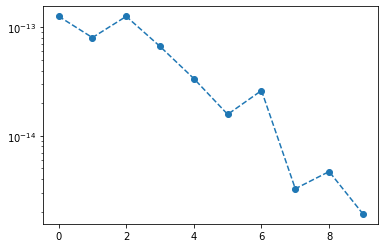

In [70]:
plt.semilogy(residuals,'o--')